# **Project Name**    - Book Recommendation System



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1**   - Deepak Singh Bisht

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/bisht-deepak/Capstone-Project-Recommendation-System

# **Problem Statement**


**Write Problem Statement Here.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
import seaborn as sns

import re

from matplotlib.ticker import PercentFormatter



### Dataset Loading

In [2]:
def convert_publishing_year(x):
    try:
        return pd.to_datetime(x, format= "%Y")
    except ValueError:
        return None

In [3]:
books_df= pd.read_csv("/kaggle/input/book-recommendation-dataset/Books.csv", converters= {"Year-Of-Publication": convert_publishing_year})#.dropna()
ratings_df= pd.read_csv("/kaggle/input/book-recommendation-dataset/Ratings.csv")#.dropna()
users_df= pd.read_csv("/kaggle/input/book-recommendation-dataset/Users.csv")

### Dataset First View

In [4]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002-01-01,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001-01-01,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991-01-01,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999-01-01,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999-01-01,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [6]:
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


#### Renaming Columns

### Dataset Rows & Columns count

In [7]:
print("Shape of")
print(f"books_df: {books_df.shape}")
print(f"ratings_df: {ratings_df.shape}")
print(f"users_df: {users_df.shape}")

Shape of
books_df: (271360, 8)
ratings_df: (1149780, 3)
users_df: (278858, 3)


### Dataset Information

In [8]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   ISBN                 271360 non-null  object        
 1   Book-Title           271360 non-null  object        
 2   Book-Author          271358 non-null  object        
 3   Year-Of-Publication  266737 non-null  datetime64[ns]
 4   Publisher            271358 non-null  object        
 5   Image-URL-S          271360 non-null  object        
 6   Image-URL-M          271360 non-null  object        
 7   Image-URL-L          271357 non-null  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 16.6+ MB


In [9]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [10]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


#### Duplicate Values

In [11]:
print("Number of Duplicated rows in ")
print(f"books_df: {books_df.duplicated().sum()}")
print(f"ratings_df: {ratings_df.duplicated().sum()}")
print(f"users_df: {users_df.duplicated().sum()}")

Number of Duplicated rows in 
books_df: 0
ratings_df: 0
users_df: 0


#### Missing Values/Null Values

In [12]:
print("Number of Missing Values in ")
print(f"books_df:\n{books_df.isnull().sum()}")
print(f"ratings_df:\n{ratings_df.isnull().sum()}")
print(f"users_df:\n{users_df.isnull().sum()}")

Number of Missing Values in 
books_df:
ISBN                      0
Book-Title                0
Book-Author               2
Year-Of-Publication    4623
Publisher                 2
Image-URL-S               0
Image-URL-M               0
Image-URL-L               3
dtype: int64
ratings_df:
User-ID        0
ISBN           0
Book-Rating    0
dtype: int64
users_df:
User-ID          0
Location         0
Age         110762
dtype: int64


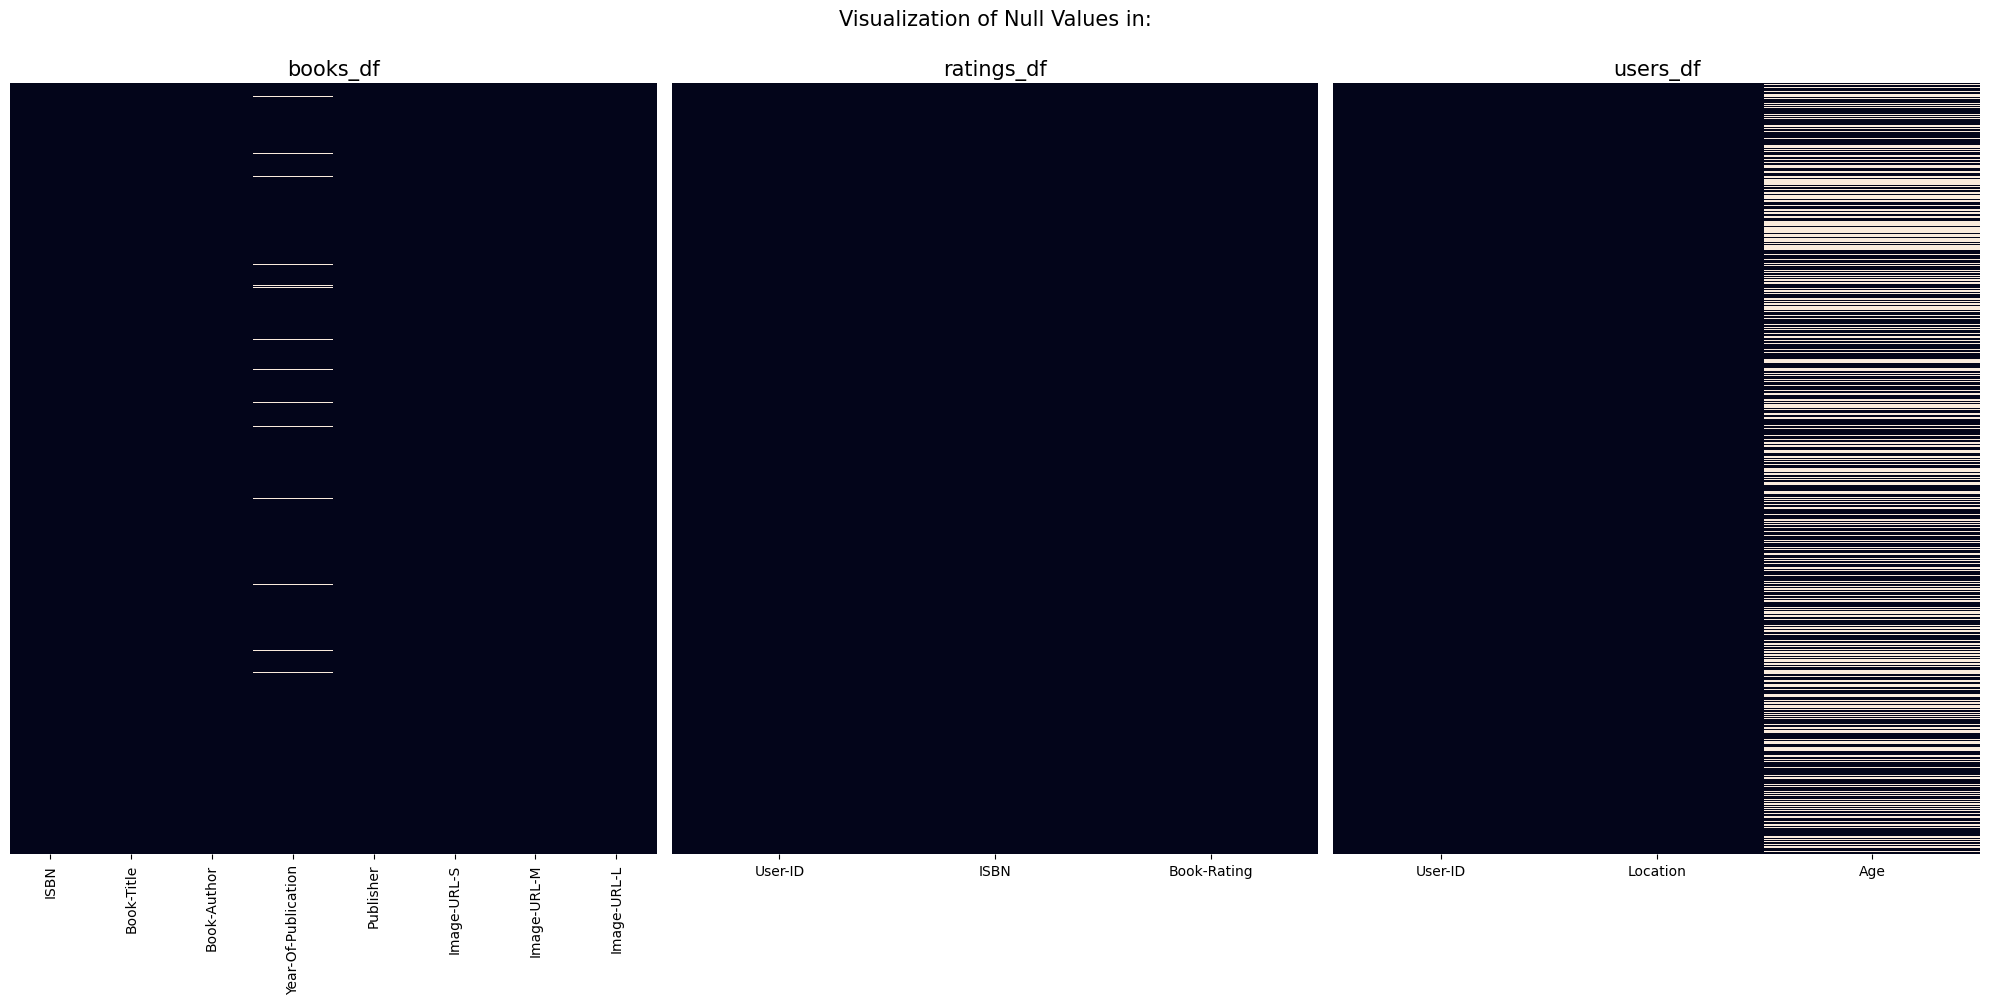

In [13]:
fig, axes= plt.subplots(1, 3, figsize= (20, 10))

sns.heatmap(books_df.isnull(), cbar= False, ax= axes[0])
axes[0].set_title("books_df", fontsize= 15)
axes[0].set_yticks([])
sns.heatmap(ratings_df.isnull(), cbar= False, ax= axes[1])
axes[1].set_yticks([])
axes[1].set_title("ratings_df", fontsize= 15)
sns.heatmap(users_df.isnull(), cbar= False, ax= axes[2])
axes[2].set_yticks([])
axes[2].set_title("users_df", fontsize= 15)

suptitle= fig.suptitle("Visualization of Null Values in:", fontsize= 15)
suptitle.set_y(1.0)

plt.tight_layout()
plt.show()

### What did you know about your dataset?

None of the three dataframes that we'll be working with has any duplicate values. 
As for null values, user_df has none, where as books_df has a few null values in author, year and publisher, which are minimal compared to the overall data, so they can be removed w/o any significant loss of data. ratings_df has 110762 null values in age. 

## ***2. Understanding Your Variables***

In [14]:
print("Variables in ")
print(f"books_df:\n{books_df.columns.tolist()}")
print(f"ratings_df:\n{ratings_df.columns.tolist()}")
print(f"users_df:\n{users_df.columns.tolist()}")

Variables in 
books_df:
['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L']
ratings_df:
['User-ID', 'ISBN', 'Book-Rating']
users_df:
['User-ID', 'Location', 'Age']


In [15]:
print("Description of ")
print(f"books_df:\n{books_df.describe(include= 'all')}")
print(f"ratings_df:\n{ratings_df.describe(include= 'all')}")
print(f"users_df:\n{users_df.describe(include= 'all')}")

Description of 
books_df:
              ISBN      Book-Title      Book-Author  \
count       271360          271360           271358   
unique      271360          242135           102022   
top     0195153448  Selected Poems  Agatha Christie   
freq             1              27              632   
mean           NaN             NaN              NaN   
min            NaN             NaN              NaN   
25%            NaN             NaN              NaN   
50%            NaN             NaN              NaN   
75%            NaN             NaN              NaN   
max            NaN             NaN              NaN   

                  Year-Of-Publication  Publisher  \
count                          266737     271358   
unique                            NaN      16807   
top                               NaN  Harlequin   
freq                              NaN       7535   
mean    1993-09-11 05:58:28.251198848        NaN   
min               1806-01-01 00:00:00        NaN   
25% 

### Variables Description of


**books_df**   

<div style="text-align: left; display: inline-block;">
    
| variable  | description               |
|-----------|---------------------------|
| isbn      | isbn code of the book     |
| title     | title of the book         |
| author    | author(s) of the book     |
| publisher | publisher(s) of the book  |
| year      | year the book was published|

</div>

**ratings_df**  

<div style="text-align: left; display: inline-block;">
    
|variable|description|
|--------|-----------|
|id|unique identification number given to each user|
|rating|user's rating of the book,either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0|
|isbn|isbn code of the book|

</div>

**users_df**  

<div style="text-align: left; display: inline-block;">
    
|variable|description|
|--------|-----------|
|id|unique identification number given to each user|
|location|a nominal variable, denoting the city, state/province and country of the user|
|age|user's age|
    
</div>

## 3. ***Data Wrangling***

### Data Wrangling Code

In [16]:
books_df.isnull().sum()

ISBN                      0
Book-Title                0
Book-Author               2
Year-Of-Publication    4623
Publisher                 2
Image-URL-S               0
Image-URL-M               0
Image-URL-L               3
dtype: int64

In [17]:
def rename_cols(X):
    x= lambda x: x[0] if x[0]== "year" else x[-1]
    return x(X.lower().split("-"))

In [18]:
def tweak_books_df(X):
    
    def extract_isbn_mapping(Y):
        x= (Y.groupby(['title', 'author'], as_index= False)
            ['isbn'].agg(list)
            ["isbn"].tolist()
           )
        globals()["isbn_mapping"]= dict()
        for i in x:
            for j in i:
                isbn_mapping[j]= i[0]
        return Y
    
    return (
        X
        .rename(rename_cols, axis= 1)
        .drop(columns= ["s", "m", "l"])
        .dropna()
        #although there are few null values in the author variable, there are some "Not Applicable (Na)" values
        .query("author!= 'Not Applicable (Na )'")
        .assign(
            title= lambda x: (
                x["title"]
                #removing characters in-between parenthesis, including parenthesis
                .str.replace(r"(\([^)]*\))", "", regex= True)
                #rewriting "and"
                .str.replace(r"&amp;", "and", regex= True)
                #removing unwanted characters
                .str.replace(r"[\\\[\](\.{2,})(\-{2,})]", "", regex= True)
                .str.replace(r"(\-{2,})", "", regex= True)
                .str.replace(r"(\.{2,})", "", regex= True)
                #removing un-necessary spaces
                .str.replace(r'\s+', " ", regex= True)
                .str.title().str.strip()
            ),
            author= lambda x: (
                x["author"]
                #rewriting "and"
                .str.replace(r"&amp;", "and", regex= True)
                #removing unwanted characters
                .str.replace(r'[\'\\;\"\-\[\]]', "", regex= True)
                #adding a period(.) at the last name initials
                .str.replace(r'([A-Z]\.\s[A-Z])\s([A-Z][a-z]+)',r"\g<1>. \g<2>", regex= True)
                #removing space b/w first and middle initials 
                .str.replace(r'([A-Z]\.)\s([A-Z]\.)', r"\g<1>\g<2>", regex= True)
                #removing "et al."
                .str.replace(r'(et\sal[\.\s])', "", regex= True, flags= re.IGNORECASE)
                #removing characters in-between parenthesis, including parenthesis
                .str.replace(r'(\([^)]*\))', "", regex= True)
                #removing extra spaces from in-between characters
                .str.replace(r'\s+', " ", regex=True)
                .str.title().str.strip()
            ),
            publisher= lambda x: (
                x["publisher"]
                .str.replace(r"&amp;", "", regex= True)
                .str.title().str.strip()
            ),
        )
        #after the above manipulations, some of the book titles have be completely oblitrated
        .query("title!= ''")
        #extracting isbn codes and mapping them to another isbn code 
        .pipe(extract_isbn_mapping)
        #
        .assign(
            isbn= lambda x: x["isbn"].map(isbn_mapping)
        )
        .drop_duplicates(["isbn", "title", "author"])
        .reset_index(drop= True)
    )

In [19]:
tweaked_books_df= tweak_books_df(books_df)
tweaked_books_df.head()

,isbn,title,author,year,publisher
0,0195153448,Classical Mythology,Mark P.O. Morford,2002-01-01,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001-01-01,Harperflamingo Canada
2,0060973129,Decision In Normandy,Carlo Deste,1991-01-01,Harperperennial
3,0374157065,Flu: The Story Of The Great Influenza Pandemic...,Gina Bari Kolata,1999-01-01,Farrar Straus Giroux
4,0393045218,The Mummies Of Urumchi,E.J. W. Barber,1999-01-01,W. W. Norton Company


In [20]:
def tweak_ratings_df(X, min_ratings):
    
    def extract_active_users(Y, min_ratings):
        globals()["active_users"]= (
            Y
            .groupby("id", as_index= False)
            .size()
            .query("size>= @min_ratings")
            ["id"]
        ).to_list()

        return Y
    
    return (
        X
        .rename(rename_cols, axis= 1)
        .query("rating!= 0")
        .assign(
            isbn= lambda x: (
                x["isbn"]
                .map(isbn_mapping)
                .fillna(x["isbn"])
            )
        )
        .pipe(extract_active_users, min_ratings= min_ratings)
        .assign(
            is_active= lambda x: np.where(x["id"].isin(active_users), 1, 0)
        )
        .reset_index(drop= True)
    )

In [21]:
min_ratings= 100
tweaked_ratings_df= tweak_ratings_df(ratings_df, min_ratings= min_ratings)
tweaked_ratings_df.head()

,id,isbn,rating,is_active
0,276726,0155061224,5,0
1,276729,052165615X,3,0
2,276729,0521795028,6,0
3,276736,3257224281,8,0
4,276737,0600570967,6,0


In [22]:
shapefile = gpd.read_file("/kaggle/input/world-shapefile/world_shapefile.shp")
shapefile.head()

,FIPS,ISO2,ISO3,UN,NAME,AREA,POP2005,REGION,SUBREGION,LON,LAT,geometry
0,AC,AG,ATG,28,Antigua and Barbuda,44,83039,19,29,-61.783,17.078,"MULTIPOLYGON (((-61.68667 17.02444, -61.88722 ..."
1,AG,DZ,DZA,12,Algeria,238174,32854159,2,15,2.632,28.163,"POLYGON ((2.96361 36.80222, 4.78583 36.89472, ..."
2,AJ,AZ,AZE,31,Azerbaijan,8260,8352021,142,145,47.395,40.430,"MULTIPOLYGON (((45.08332 39.76805, 45.81999 39..."
3,AL,AL,ALB,8,Albania,2740,3153731,150,39,20.068,41.143,"POLYGON ((19.43621 41.02107, 19.60056 41.79666..."
4,AM,AM,ARM,51,Armenia,2820,3017661,142,145,44.563,40.534,"POLYGON ((45.15387 41.19860, 46.00194 40.22555..."


In [108]:
country= (
    shapefile
    [["ISO2", "ISO3", "NAME"]]
    .rename(columns= lambda x: x.lower())
    .assign(
        iso2= lambda x: x["iso2"].str.lower().str.strip(),
        iso3= lambda x: x["iso3"].str.lower().str.strip(),
        name= lambda x: x["name"]
        .str.replace(r'(\([^)]*\))', "", regex= True)
        .str.replace(r"viet nam", "vietnam", regex= True)
        .str.lower().str.strip()
    )
)
country.head()

,iso2,iso3,name
0,ag,atg,antigua and barbuda
1,dz,dza,algeria
2,az,aze,azerbaijan
3,al,alb,albania
4,am,arm,armenia


In [59]:
country.query("name== 'united arab emirates'")

,iso2,iso3,name
227,ae,are,united arab emirates


In [60]:
us_states= (
    pd
    .read_csv("/kaggle/input/latitude-and-longitude-for-every-country-and-state/world_country_and_usa_states_latitude_and_longitude_values.csv")
    [["usa_state_code", "usa_state"]]
    .dropna()
    .assign(
        usa_state_code= lambda x: x["usa_state_code"].str.lower().str.strip(),
        usa_state= lambda x: x["usa_state"].str.lower().str.strip(),
    )
)
us_states.head()

,usa_state_code,usa_state
0,ak,alaska
1,al,alabama
2,ar,arkansas
3,az,arizona
4,ca,california


In [61]:
def get_country_name(y):
    
    country_name= country["name"].tolist()
    iso2= country["iso2"].tolist()
    iso3= country["iso3"].tolist()
    us_state_codes= us_states["usa_state_code"].tolist()
    us_state_names= us_states["usa_state"].tolist()
    
    #country specific changes
    us_alternatives= ["united "]
    spain_alternatives= []
    china_alternatives= []
    srilanka_alternative= []
    
    try:
        if y== None:
            return None
        
        elif len(y)< 2:
            return None

        elif len(y)== 2:
            if y in iso2:
                return country.loc[country["iso2"]== y, "name"].squeeze()
            elif y in us_state_codes:
                return "united states"
            else:
                return f"AAAAAAAAAAA-{y}-BBBBBBBBBBBBB"

        elif len(y)== 3:
            if y in iso3:
                return country.loc[country["iso3"]== y, "name"].squeeze()
            else:
                return f"CCCCCCCCCCCCCCCC-{y}-DDDDDDDDDDDDDD"

        else:
            if y in country_name:
                return y
            elif y in us_state_names:
                return "united states"
            else:
                return f"EEEEEEEEEEEEE-{y}-xxxxxxxxxxxxx"
    
    except:
        print(f"111111111111111111-{y}")
        print(f"index- {abc['country'== y].index}")

In [62]:
#bif bih bkk

In [ ]:
abc= (
    (
    users_df
    .assign( 
        country= lambda x: x["Location"]
        .str.split(",")
        .map(lambda y: y[-1])
        .str.lower()
        .str.replace(r"`", "'", regex= True)
        .str.replace(r"\bla\s", "", regex= True)
        .str.replace(r"\ble\s", "", regex= True)
        .str.replace(r"\bthe\s", "", regex= True)
        .str.replace(r"é", "e", regex= True)
        .str.replace(r"ç", "z", regex= True)
        #correcting some country names
#         .str.replace(r"afganstand holla", "afghanistan", regex= True)
#         .str.replace(r"srilanka|sri lankana", "srilanka", regex= True)
#         .str.replace(r"indiai", "india", regex= True)
#         .str.replace(r"brunei", "brunei darussalam", regex= True)
#         .str.replace(r"vatican city", "holy see", regex= True)
#         .str.replace(r"libya", "libyan arab jamahiriya", regex= True)
#         .str.replace(r"hongkong", "hong kong", regex= True)
#         .str.replace(r"swazilandia", "swaziland", regex= True)
#         .str.replace(r"copenhagen", "denmark", regex= True)
        
        .str.replace(r"[.@öð¹ú_\"!0-9/\\?{*&ãº>}=\-¸äå½#;]", "", regex= True)
        #removing characters in-between parenthesis, including parenthesis
        .str.replace(r'(\([^)]*\))', "", regex= True)
        .str.replace(r"\s+", " ", regex= True)
        .str.strip()
    )
#     .assign(
#         country_new= lambda x: x["country"].apply(get_country_name)
#     )
)#["country_new"].unique().tolist()
)
abc.head()

In [ ]:
xyz= (abc["country"].apply(get_country_name).dropna().unique().tolist())

In [ ]:
print(get_country_name("cote d'ivoire"))

In [ ]:
abc.query("country.str.contains('')", engine='python')["country"]#.tolist()

In [ ]:
abc.query("country== 'il canada'")

In [ ]:
country.query("iso3.str.contains('vnm')", engine='python')

In [ ]:
sorted(xyz)

In [ ]:
def tweak_users_df(X):
    
    mean_age= X["Age"].mean().round(2)
    
    return (
        X
        .rename(rename_cols, axis= 1)
        .assign(
            country= lambda x: (
                x["location"]
                .str.split(",")
                .map(lambda x: x[-1])
                .str.replace(r"[.@öð¹ú_\"!0-9/\\`?{*&ãº>}=\-¸äå½#;]", "", regex= True)
                .str.strip().str.lower()
            ),
            age= lambda x: x["age"].fillna(mean_age),
            is_active= lambda x: np.where(x["id"].isin(active_users), 1, 0)
        )
        .drop(columns= ["location"])
    )

In [28]:
tweaked_users_df= tweak_users_df(users_df)
tweaked_users_df.head()

,id,age,country,is_active
0,1,34.75,usa,0
1,2,18.00,usa,0
2,3,34.75,russia,0
3,4,17.00,portugal,0
4,5,34.75,united kingdom,0


In [33]:
(
    tweaked_users_df
    .groupby("country", as_index= False)
    .size()
    .sort_values("size", ascending= False)
)

,country,size
554,usa,139715
88,canada,21658
538,united kingdom,18557
198,germany,17073
477,spain,13258
...,...,...
362,none,1
361,no more,1
360,nl,1
149,dublin,1


<Axes: xlabel='country', ylabel='count'>

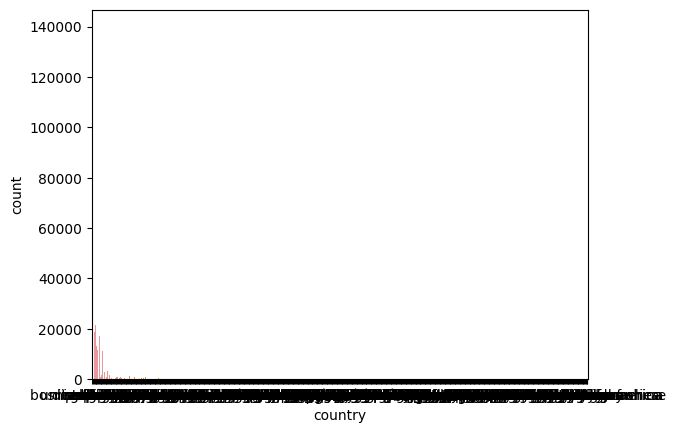

In [29]:
sns.countplot(data= tweaked_users_df, x= "country")

### What all manipulations have you done and insights you found?

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
time_series_df= (
    tweaked_books_df
    .groupby(tweaked_books_df["year"].dt.year, as_index= False)
    .size()
)

sns.lineplot(data= time_series_df, x= "year", y= "size")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

In [ ]:
print(tweaked_books_df["author"].nunique())
print(tweaked_books_df["publisher"].nunique())

In [ ]:
top_ten_authors= (
    tweaked_books_df
    .groupby(["author"], as_index= False)
    .size()
    .sort_values("size", ascending= False, ignore_index= True)
    .iloc[:10]
)

sns.barplot(
    data= top_ten_authors,
    x= "author", y= "size",
    color= "#1f77b4"
)

plt.tick_params(bottom = False) 

plt.xticks(rotation= "vertical", position= (0.0, 0.05), color= "white",
           horizontalalignment= "center", verticalalignment= "baseline")

plt.title("Top 10 Authors (based on number of books written)")
plt.xlabel(None)
plt.ylabel("Number of Books")

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

In [ ]:
top_ten_publishers= (
    tweaked_books_df
    .groupby(["publisher"], as_index= False)
    .size()
    .sort_values("size", ascending= False, ignore_index= True)
    .iloc[:10]
)

sns.barplot(
    data= top_ten_publishers,
    x= "publisher", y= "size",
    color= "#1f77b4"
)
plt.tick_params(bottom = False)
plt.xticks(rotation= "vertical", position= (0.0, 0.05), #color= "white",
           horizontalalignment= "center", verticalalignment= "baseline")
plt.xlabel("Publisher")
plt.ylabel("Number of Books")
plt.title("Top 10 Publishers (based on number of books published)")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

In [ ]:
#percentage of ratings by active users compared to non-active users
ratings_by_active_users= (
    tweaked_ratings_df
    .groupby("is_active", as_index= False)
    .agg({"id": "count"})
    .assign(
        is_active= lambda x: x["is_active"].map({0: f"Users with less than {min_ratings} ratings", 1: f"Users w/ more than {min_ratings} ratings"})
    )
)


fig= plt.figure(figsize= (5, 5))
plt.pie(
    "id", labels= "is_active", 
    explode= (0.1, 0), shadow= True,
    data= ratings_by_active_users, 
    autopct='%1.1f%%', pctdistance= 0.4,
    labeldistance= 0.55
)

plt.title("Proportion of Active/Not-So Active Users")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

In [ ]:
# Sort the DataFrame by ratings in descending order
def get_contributions_df(X):

    def extract_meta(Y):
        globals()["num_users"]= Y.shape[0]
        globals()["total_size"]= Y["size"].sum()
        bin_range= np.round(np.linspace(0, num_users, num = 11), 0)
        globals()["bins"]= pd.cut(Y["index"], bins= bin_range)
        return Y


    return (
        X
        [["id", "rating"]]
        .groupby("id", as_index= False)
        .size()
        .sort_values("size", ascending= False, ignore_index= True)
        .reset_index()
        .pipe(extract_meta)
        .groupby(bins)
        .agg({"size": np.sum})
        .reset_index()
        .assign(
            cumperc= lambda x: np.round((x["size"].cumsum()/total_size)*100, 2),
            perc_users= lambda x: np.round((pd.IntervalIndex(x["index"]).right/num_users)*100, 2)
        )
    )

contribution_by_id= get_contributions_df(tweaked_ratings_df)

fig, ax= plt.subplots(sharex= True)
sns.barplot(data= contribution_by_id, x= "perc_users", y= "size", 
            color= "#1f77b4", ax= ax)
ax.set_xlabel("Percentage of Users")
ax.set_ylabel("Number of Ratings")

ax2= ax.twinx()
ax2.plot(contribution_by_id["cumperc"], marker= "o", color= "#ff7c0c")
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.set_ylim(0,102)
ax2.set_ylabel("Cumulative Percentage of Number of Ratings", rotation= 270)

plt.grid(True, zorder= 0)
plt.title("Pareto Chart")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

In [ ]:
#id which made the most contribution
top_ten_ids= (
    tweaked_ratings_df
    .groupby("id", as_index= False)
    .size()
    .sort_values("size", ascending= False)
    [:10]
)


sns.barplot(
    data= top_ten_ids, y= "size", x= "id", 
    order= top_ten_ids["id"],
    color= "#1f77b4"
)

plt.xticks(
    rotation= "vertical", position= (0.0, 0.05), #color= "white",
    horizontalalignment= "center", verticalalignment= "baseline"
)
plt.tick_params(bottom = False) 
plt.title("Top 10 Users (based on number of books rated)")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

In [ ]:
#histplot of ratings
sns.countplot(data= tweaked_ratings_df, x= "rating",
    color= "#1f77b4")
plt.xlabel("Rating")
plt.ylabel("Number of Ratings")
plt.title("Distribution of Ratings")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

In [ ]:
(
    tweaked_users_df
    .groupby(["country", "is_active"], as_index= False)
    .size()
    .sort_values("size", ascending= False, ignore_index= True)
    ["country"]
    .unique()
    .tolist()
)

In [ ]:
import geopandas as gpd

In [ ]:
#geo map of users


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

In [ ]:
#age wise distribution of users
sns.histplot(data= tweaked_users_df["age"].apply(lambda x: x+1e-5), kde= True, log_scale= True)
plt.ylim(0, 7000)
plt.xlim(1, 300)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

In [ ]:
sns.boxplot(data= tweaked_users_df, x= "age")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

### Popularity Based Recommendations

 $ \text{Weighted Rating (WR)} = \left( \frac{v}{v+m} \right) \cdot R + \left( \frac{m}{v+m} \right) \cdot C
 $  
 where,  
 v= num of votes,  
 m= min num of votes required to be listed in the Top 50,  
 R= mean book rating,  
 C= mean vote across the whole report,  

In [ ]:
def calc_weighted_rating(X, Y, min_votes= 100):
    
    def extract_mean_report_rating(Z):
        globals()["mean_report_rating"]= Y["rating"].mean()
        return Z
    
    return (
        pd.merge(
            X[["isbn", "title", "author"]], Y[["isbn", "rating", "id"]], 
            on= "isbn", how= "right"
        )
        .dropna()
        .pipe(extract_mean_report_rating)
        .groupby(["isbn", "title", "author"], as_index= False)
        .agg({"rating": np.mean, "id": "count"})
        .rename(columns= {"rating": "avg_rating", "id": "num_votes"})
        .assign(
            weighted_rating= lambda x: (
                (x["num_votes"]/(x["num_votes"]+ min_votes))*x["avg_rating"] + 
                (min_votes/(min_votes+ x["num_votes"]))* mean_report_rating
            )
        )
        .sort_values("weighted_rating", ascending= False)
        .reset_index(drop= True)
        [["isbn", "title", "author", "weighted_rating"]]
    )

In [ ]:
top_50_popular_books= calc_weighted_rating(tweaked_books_df, tweaked_ratings_df).loc[:50]
top_50_popular_books#.head(50)

### Colaborative Filtering